# Recoinize

[https://github.com/nicknochnack/FaceRecognition](https://github.com/nicknochnack/FaceRecognition/blob/main/Facial%20Verification%20with%20a%20Siamese%20Network%20-%20Final.ipynb)

# Setup

## Pull code from GitHub

In [4]:
from src.helpers.cmd import git_update, print_gpu_name
from src.helpers.install import install_requirements
git_update("live-edit", force=False, show_output=False)
# install_requirements()

Already on 'live-edit'



Exception: Already on 'live-edit'


In [3]:
print_gpu_name()

'Quadro P5000\n'

## Import dependencies

In [1]:
testing = True

In [12]:
# Import standard dependencies
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

# Import tensorflow dependencies - Functional API
if not testing:
    import tensorflow as tf
    from tensorflow import keras
    from keras.layers import Dense, Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
    from keras.models import Sequential, load_model, Model
    from datasets import load_dataset

    from src.models import make_embedding, make_siamese_model
    from src.helpers.setup import set_gpus_growth
    from src.helpers.dataset import create_pairs
    from src.helpers.preprocess import preprocess

    set_gpus_growth()
else:
    print("Testing mode, skipping tensorflow imports")
    %load_ext autoreload
    %autoreload 2
    from src.helpers.load_data import load_data
    from src.dataset import create_pairs


Testing mode, skipping tensorflow imports
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Get and preprocess data

In [13]:
# Load the dataset from HuggingFace
if not testing:
    dataset = load_dataset('photonsquid/coins-euro')
    dataset = dataset.with_format('tf')
else:
    # load data from local files
    dataset = load_data("data/tests")

In [53]:
# Split the dataset into train and test
train_dataset = dataset['train']
test_dataset = dataset['test']

In [ ]:
# Preprocess the data
train_dataset['image'].map(preprocess)
test_dataset['image'].map(preprocess)

In [54]:
# create the pairs and labels for the training dataset
train_dataset = create_pairs(train_dataset)

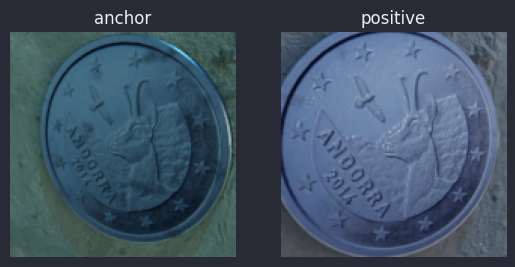

In [55]:
# show first pair in subplot with plt
plt.subplot(1, 2, 1)
plt.imshow(pairs[0][0])
plt.axis('off')
plt.title("anchor")
plt.subplot(1, 2, 2)
plt.imshow(pairs[0][1])
plt.axis('off')
plt.title("positive" if sum(pairs[0][2]) == 5 else "negative")
plt.rcParams['figure.facecolor'] = '#282A36'
plt.rcParams['text.color'] = '#ecf0f1'
plt.show()

In [ ]:
# prepare the dataset for training
train_dataset = train_dataset.shuffle(1000)
train_dataset = train_dataset.batch(32)
train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)

# prepare the dataset for testing
test_dataset = test_dataset.shuffle(1000)
test_dataset = test_dataset.batch(32)
test_dataset = test_dataset.prefetch(tf.data.experimental.AUTOTUNE)